In [1]:
title = "ogs@jupyter-lab: TH2M: THM_1d_dirichlet"
variables = ['temperature_interpolated','liquid_pressure_interpolated']
variable = "temperature"
coordinate = "x"

**ogs@jupyter-lab: TH2M: T_1d_dirichlet**

<!--- ![tu-dresden-blue.png](attachment:tu-dresden-blue.png) --->
<img src="ogs-workflows.png" alt="drawing" width="300"/>

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [2]:
from ogs6py import ogs
#run ogs
print("===============")
print(">>> run ogs <<<")
model = ogs.OGS(PROJECT_FILE="THM_1d_dirichlet.prj")
model.run_model(path="/home/ok/ogs/build/release/bin/",LOGFILE="example.log")

>>> run ogs <<<
OGS finished with project file THM_1d_dirichlet.prj.
Execution took 4.237950325012207 s


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

>>> print results <<<
result_1d_dirichlet_slab.pvd


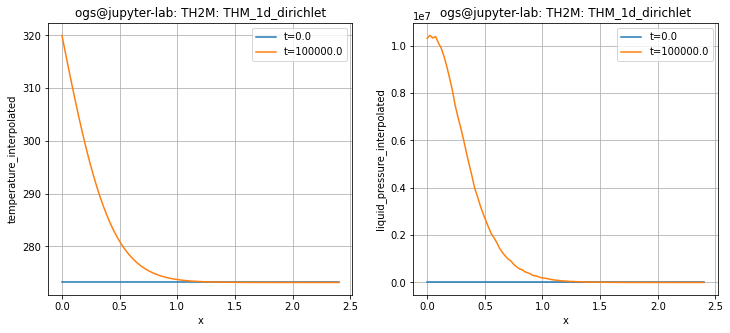

In [3]:
# to read and process (point interpolation) vtu- and pvd-files 
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
print("=====================")
print(">>> print results <<<")
pvdfile=vtuIO.PVDIO("result_1d_dirichlet_slab.pvd", dim=1)
# define xaxis
xaxis =  [(i,0,0) for i in np.linspace(start=0.0, stop=2.4, num=100)]
x = np.array(xaxis)[:,0]
# define timestep
time = [0.,100000.]
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
# read and interpolate from vtu-files listed in pvd
for t in time:
    xaxis_t = pvdfile.read_point_set_data(t, 'temperature_interpolated', pointsetarray=xaxis)
    ax[0].plot(x, xaxis_t, label='t='+str(t))
    xaxis_t = pvdfile.read_point_set_data(t, 'liquid_pressure_interpolated', pointsetarray=xaxis)
    ax[1].plot(x, xaxis_t, label='t='+str(t))
# plot formatting
ax[0].set_title(title)
ax[0].set_xlabel(coordinate)
ax[0].set_ylabel(variables[0])
ax[0].legend()
ax[0].grid()
ax[1].set_title(title)
ax[1].set_xlabel(coordinate)
ax[1].set_ylabel(variables[1])
ax[1].legend()
ax[1].grid()
plt.savefig("plot.png")
plt.show()

In [4]:
import time
print(time.ctime())

Sun Jun  6 17:28:02 2021


**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: tbc
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/T/T_1d_dirichlet/T_1d_dirichlet.prj
- notebook compilation by OK (https://github.com/OlafKolditz/ogs-jupyter-lab)



**Credits**
- Norbert Grunwald for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (JOSS review pending) https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc
